<div style="border: 2px solid #ccc; border-radius: 12px; padding: 20px; max-width: 1000px; margin: auto; background-color: #1e1e1e; color: #f0f0f0; font-family: Arial, sans-serif; line-height: 1.6;">

  <div style="text-align: center; margin-bottom: 20px;">
    <img src="../image/green_coffee_beans.jpg" 
         alt="Science Direct study of coffee beans quality and taste as it relates to environmental factors" 
         style="width: 75%; max-width: 100%; height: auto; border-radius: 8px; box-shadow: 0 0 10px rgba(0,0,0,0.4);">
  </div>

  <blockquote style="margin: 0; padding: 10px 20px; border-left: 4px solid #4faaff;">
    <p><strong>
      "Coffee is among the most popular beverages globally due to its unique sensory properties and pleasant taste (Pereira et al., 2020). There are two main species of coffee traded worldwide: <em>Coffea arabica</em>, which is the most produced and consumed, and <em>Coffea robusta</em>. <em>Coffea arabica</em> is known for its superior flavor and higher market value, when compared to <em>Coffea robusta</em> (El-Abassy et al., 2011). To ensure its superior quality, <em>Coffea arabica</em> has been cultivated in regions with specific characteristics, including well-distributed precipitation <b>(1200–1800 mm)</b> throughout the fruiting period, mild temperatures <b>(18–23 °C)</b>, and low altitude <b>(600–1200 m)</b> (de Mesquita et al., 2016). Brazil is the top producer of arabica coffee globally (do Rosário et al., 2023). According to the Brazilian National Supply Company (CONAB), it is estimated that in 2024, there will be a <b>5.5 % increase in green coffee beans production</b>, reaching 58.08 million 60 kg bags (Conab, 2024). The production of <em>Coffea Arabica</em> beans is expected to increase by <b>2% in 2024</b> with a significant portion cultivated in the Minas Gerais state (Conab, 2024). Notably, the Cerrado Mineiro region is vital, producing <b>12.7%</b> of national <em>Coffea arabica</em> beans and <b>25.4%</b> of the total production in the <b>Minas Gerais state</b> (Federation of Cerrado Coffee Growers, 2023)."
    </strong></p>
    <p>— From 
      <a href="https://www.sciencedirect.com/science/article/abs/pii/S0308814624033338" target="_blank" style="color: #4faaff;">
        Science Direct
      </a>
    </p>
  </blockquote>

</div>


# Explore Cofffee

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [86]:
# Import necessary libraries
from scipy.stats import pearsonr # for correlation calculation
from scipy.stats import shapiro # for normality testing
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations 
import plotly.express as px # for interactive plots

import seaborn as sns # for data visualization 
import matplotlib.pyplot as plt # for data visualization 
import math # for mathematical operations not found in numpy or native python
import matplotlib.ticker as ticks # for axis formatting 

In [87]:
# import data
coffee = pd.read_csv("../data/crop/coffee_output.csv")

In [88]:
# TODO: view first 5 rows of your data
coffee.head()

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
1,Brazil,Espirito Santo,Arabica,2.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
2,Brazil,Espirito Santo,Robusta,7.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
3,Brazil,Sao Paulo,Arabica,3.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
4,Brazil,Parana,Arabica,0.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0


In [45]:
coffee.shape

(114, 11)

In [89]:
# TODO: describe your numeric columns
coffee.describe()

,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
count,114.000000,114.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,8.812281,2012.552632,994.495413,5646.926606,298.055046,2146.513761,2639.027523,3345.082569
std,9.051550,6.265642,310.338484,372.684151,97.572559,96.699000,245.497999,175.124513
min,0.500000,2002.000000,466.000000,4465.000000,148.000000,2010.000000,2106.000000,3030.000000
25%,2.600000,2007.000000,679.000000,5640.000000,205.000000,2070.000000,2552.000000,3191.000000
50%,4.750000,2013.000000,1050.000000,5735.000000,307.000000,2135.000000,2679.000000,3415.000000
75%,12.175000,2018.000000,1185.000000,5810.000000,347.000000,2223.000000,2786.000000,3483.000000
max,34.800000,2023.000000,1510.000000,6200.000000,495.000000,2360.000000,3020.000000,3578.000000


### Observations and Questions gained from Descriptive Statistics of Coffee Data Set:

**Observations**
-  Average production per year, 60kgs_bag, is ~8.81 bags, with a wide range from 0.5 to 34.8 bags suggesting possible outliers or unusually high-yield years.
  - The mean is ~8.8 and median ~4.8, which suggests a right skewed graph, meaning some higher value(s) are pulling the graph to the right.
- Nonbearing vs. bearing trees:
  - Nonbearing trees: ~994 avg, with high variability--std = 310
  - Bearing trees: ~5647 avg, with lower variability--std = 373--suggesting more stability in producing trees.
- Tree density per hectare:
  - Bearing trees: ~2639 trees/hectare
  - Nonbearing trees: ~3345 trees/hectare — denser planting in nonbearing sites may reflect newer, more intensive cultivation efforts.
- Hectares under production:
  - Bearing hectares: ~2146
  - Nonbearing hectares: ~298--much smaller area--consistent with newer sites still in development.                        

**Questions**
- Are the years with the highest 60kgs_bag values associated with maximum bearing tree count?
- Does tree density per hectare correlate positively or negatively with total yield?
- What farming practices or environmental conditions might explain the jump to 34.8 bags in the maximum year??
- Is there a yield plateau effect once bearing trees exceed a certain density??

**Additional Notes:**
- I may create a time series plot of 60kgs_bag vs. year, with a 3-year rolling average to visualize production stability.
- **TODO:** create scatter plots or correlation matrices to investigate relationships between:
  - Yield vs. tree count
  - Yield vs. density
  - Bearing vs. nonbearing production.

**Resources:**

In [90]:
# TODO: display the null values in your dataframe
coffee.isna().sum()

country                         0
subdivision                     0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                5
bearing_trees                   5
nonbear_hectares                5
bearing_hectares                5
bearing_trees_per_hectare       5
nonbearing_trees_per_hectare    5
dtype: int64

In [91]:
# TODO: drop your null values
dropp_coffee = coffee.dropna()

In [92]:
dropp_coffee.isna().sum()

country                         0
subdivision                     0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                0
bearing_trees                   0
nonbear_hectares                0
bearing_hectares                0
bearing_trees_per_hectare       0
nonbearing_trees_per_hectare    0
dtype: int64

In [93]:
dropp_coffee.shape

(109, 11)

In [94]:
# TODO: Select only Minas Gerais
minas_coffee = dropp_coffee[dropp_coffee['subdivision'] == 'Minas Gerais']

In [95]:
minas_coffee.head()

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
5,Brazil,Minas Gerais,Arabica,26.7,2003,1125.0,5265.0,315.0,2360.0,2231.0,3577.0
10,Brazil,Minas Gerais,Arabica,14.4,2004,631.0,5050.0,205.0,2174.0,2323.0,3075.0
15,Brazil,Minas Gerais,Arabica,21.4,2005,466.0,5255.0,148.0,2305.0,2280.0,3149.0
20,Brazil,Minas Gerais,Arabica,16.3,2006,581.0,5330.0,175.0,2298.0,2319.0,3320.0


In [96]:
print(f"Shape of Minas Gerais subdivision dataframe: {minas_coffee.shape}")

Shape of Minas Gerais subdivision dataframe: (21, 11)


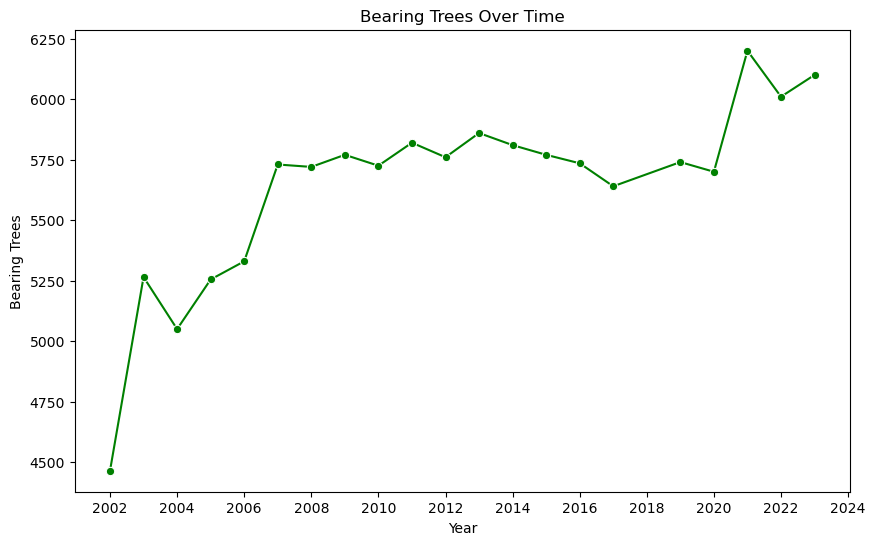

In [97]:
# TODO: BEGIN YOUR EDA!
#How is bearing trees changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this
# variable? Is it normal?

plt.figure(figsize=(10, 6))
sns.lineplot(data=minas_coffee, x="year", y="bearing_trees", marker="o", color="green")
plt.title("Bearing Trees Over Time")
plt.xlabel("Year")
plt.ylabel("Bearing Trees")
plt.gca().xaxis.set_major_locator(ticks.MultipleLocator(2))



### Observations and Questions gained from Line Plot of Bearing Trees over Time:
**Observations**
- There is a clear upward trend in the number of bearing coffee trees from 2002 to around 2013, indicating significant expansion in productive capacity.
- Between 2014 and 2021, the number appears to plateau, with minor year-to-year variations but no strong upward or downward trajectory.
- A sharp increase occurs around 2021–2022, reaching the highest count on record, followed by a slight dip and recovery in 2023.
- This suggests possible external interventions or favorable conditions post-2020--replanting, improved cultivation, or recovery from earlier stress.

**Questions**
- What caused the sudden surge around 2021–2022? 
- How does this trend in bearing trees correlate with yield (60kg bags) over time — is there a proportional increase, or do other factors--pests, weather modulate productivity?
- Did climate or environmental shifts influence the observed plateau during 2014–2020?

**Additional Notes:** 
- A Pearson correlation coefficient with year would likely reveal a moderately strong positive correlation, but it's important to validate this with code.
- Plotting a rolling mean or applying a time series to distinguish between trend or seasonal components.

**Resources:**

In [98]:
# Check distribution of bearing trees
r, p = pearsonr(minas_coffee['year'], minas_coffee['bearing_trees'])
print(f"Pearson's r: {r:.2f}, p-value: {p:.3e}")

# Check for normality using Shapiro-Wilk test
stat, p_value = shapiro(minas_coffee['bearing_trees'])
print(f"Shapiro-Wilk Test: p-value = {p_value:.3f}")
if p_value < 0.05:
    print("Data is not normally distributed (reject H0)")
else:
    print("Data appears normally distributed (fail to reject H0)")


Pearson's r: 0.78, p-value: 3.382e-05
Shapiro-Wilk Test: p-value = 0.003
Data is not normally distributed (reject H0)


### Observations and Questions gained from Pearson Correlation Coefficient And Shapiro-Wilk Test between Years vs. Bearing Trees:

**Observations**
- The Pearson correlation coefficient (r = 0.78) indicates a strong positive linear relationship between Year and Bearing Trees — suggesting that the number of bearing trees in Minas Gerais has generally increased over time.
- The p-value (3.382e-05) confirms that this correlation is statistically significant at the α = 0.05 level, meaning the observed trend is unlikely due to random chance (normally distributed).
- The Shapiro-Wilk Test yielded a p-value of 0.003, which is less than 0.05, so we reject the null hypothesis that the bearing tree data is normally distributed. This implies the distribution may be skewed, multimodal, or otherwise non-normal.

**Questions**
- What factors might be driving the increase in bearing trees — are these agricultural policies, climate adaptation, or expansion of planting?
- Since the data is not normally distributed, should non-parametric methods (like Spearman correlation or Kendall’s tau) be used to validate findings?
- Would breaking the data into sub-periods reveal changes in the trend (e.g., before and after 2010)?

**Additional Notes:**
- Plot Histogram to visualize the distribution of bearing trees and confirm the shape visually.
- Since correlation assumes linearity and normality, maybe combining scatter plots, histograms, and box plots may provide a more detailed understanding.

**Resources:**
- [Shapiro-Wilk Test (Wikipedia)](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)
- [Python Histogram Plotting](https://realpython.com/python-histograms/)


C:\Users\oneps\AppData\Local\Temp\ipykernel_18700\3881250898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minas_coffee.loc[:,'quartile_group'] = pd.qcut(minas_coffee['bearing_trees'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


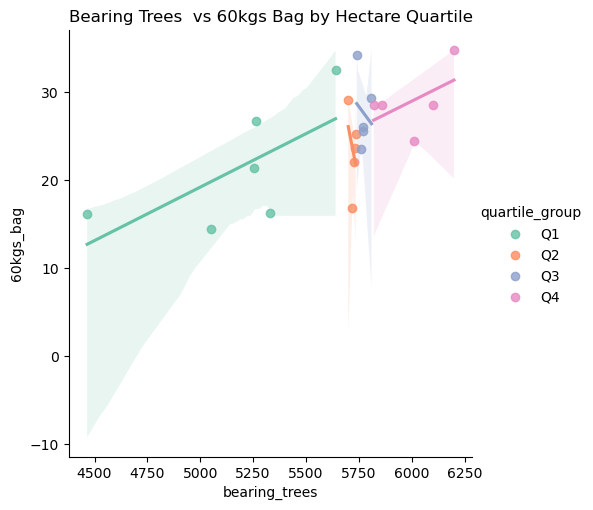

In [99]:
# Create based quartiles or production groupings
minas_coffee.loc[:,'quartile_group'] = pd.qcut(minas_coffee['bearing_trees'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Scatter with hue
#plt.figure(figsize=(10, 6))
sns.lmplot(data=minas_coffee, x='bearing_trees', y='60kgs_bag', hue='quartile_group', palette='Set2')
plt.title('Bearing Trees  vs 60kgs Bag by Hectare Quartile')
plt.show()


### Observations and Questions gained from Quartile Groups of Bearing Trees Per 60kgs Bag:

**Observations**
- Per Simpson's Paradox: The scatter plot segmented by quartile groups shows distinct production patterns based on the number of bearing trees.
  - Quartile 1 (Q1) shows a strong positive correlation between the number of bearing trees and coffee output (60kgs_bag), but with higher variability.
  - Quartile 2 (Q2) looks to be more volatile with a flatter or slightly negative slope, which indicates inconsistent yield in mid-range bearing tree counts.
  - Quartile 3 (Q3) has the tightest clustering and minimal slope, indicating stable yields regardless of small changes in tree count.
  - Quartile 4 (Q4) continures in a positive direction, showing that higher-end bearing tree counts coressponds to higher outputs, but with diminishing returns compared to Q1.

**Questions**
- Why does Quartile 2 show a flatter or slightly negative trend? What external factors could explain this anomaly?
- Is there an optimal density of bearing trees beyond which yield efficiency starts plateauing?
- Should coffee planting strategies consider this quartile-based insight for maximizing return per hectare?

Additional Notes: 
- This quartile-based stratification offers a deeper layer of insight beyond a correlation coefficient.
- Visualizing regression lines within quartile groups helps isolate local trends and detect non-linearities that global statistics may miss.
- Further stratified regression or interaction term modeling might reveal whether quartile membership significantly influences yield trends.

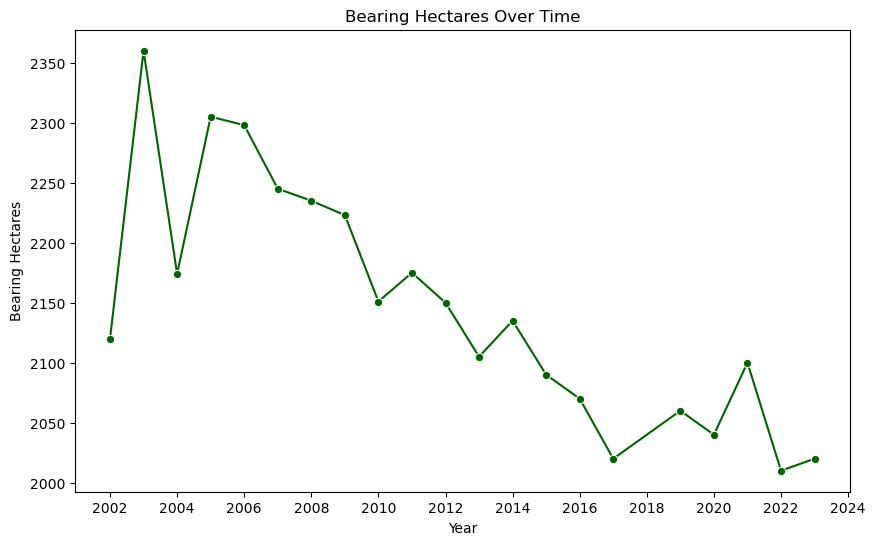

In [100]:
# TODO: BEGIN YOUR EDA!
plt.figure(figsize=(10, 6))
sns.lineplot(data=minas_coffee, x="year", y="bearing_hectares", marker="o", color="darkgreen")
plt.title("Bearing Hectares Over Time")
plt.xlabel("Year")
plt.ylabel("Bearing Hectares")
plt.gca().xaxis.set_major_locator(ticks.MultipleLocator(2))

### Observations and Questions gained from Bearing Hectares over Time:

**Observations**
- There is a clear long-term decline in the total number of bearing hectares from 2003 onward.
- After peaking around 2003 (≈2360 hectares), the area gradually shrinks to just above 2000 hectares by 2023, marking a noticeable reduction in land area dedicated to bearing coffee trees.
- Despite minor fluctuations (e.g., rebounds in 2005, 2011, and 2021), the overall trend is downward, suggesting land consolidation, reallocation, or stress on suitable cultivation zones.
- This trend contrasts with the increasing number of bearing trees, suggesting that more trees are being cultivated per hectare over time (i.e., intensification of use).

**Questions:**
- What factors contributed to the consistent decline in bearing hectares? Are we seeing a response to climate pressure, urbanization, or agricultural optimization?
- Is the productivity per hectare improving (i.e., more yield per unit area), or are we risking soil exhaustion and reduced sustainability?
- How do trends in non-bearing hectares compare — are those areas increasing to signal future planting, or declining as well?

Additional Notes: 
- This plot would be enhanced by overlaying productivity metrics (e.g., yield per hectare or bearing trees per hectare).
- Calculating and comparing correlation coefficients between year and bearing_hectares versus bearing_trees could help quantify the opposing trends.

**Resources:**

In [101]:
# Check distribution of bearing trees
r, p = pearsonr(minas_coffee['year'], minas_coffee['bearing_hectares'])
print(f"Pearson's r: {r:.2f}, p-value: {p:.3e}")

# Check for normality using Shapiro-Wilk test
stat, p_value = shapiro(minas_coffee['bearing_trees'])
print(f"Shapiro-Wilk Test: p-value = {p_value:.3f}")
if p_value < 0.05:
    print("Data is not normally distributed (reject H0)")
else:
    print("Data appears normally distributed (fail to reject H0)")


Pearson's r: -0.82, p-value: 4.436e-06
Shapiro-Wilk Test: p-value = 0.003
Data is not normally distributed (reject H0)


### Observations and Questions gained from Pearson Correlation Coefficient And Shapiro-Wilk Test between Years vs. Bearing Hectares:

**Observations**
- The Pearson correlation coefficient is r = -0.82, indicating a strong negative linear relationship between year and bearing hectares. This suggests that as time progresses, the total area of land under bearing coffee cultivation in Minas Gerais has decreased significantly.
- The p-value (4.436e-06) is much lower than 0.05, meaning this inverse trend is statistically significant--we can be confident this pattern isn't due to random variation.
- The Shapiro-Wilk test returned a p-value of 0.003, which is below 0.05, leading us to reject the null hypothesis of normality. The data for bearing_hectares is therefore not normally distributed, and may have skewness or outliers influencing the distribution.

**Questions**
- What are the underlying causes for the decline in bearing hectares? Could this be due to:
- Reallocation of land to other crops?
- Climate change or soil degradation?
- Changes in farming strategy (e.g., intensification on smaller plots)?
- Despite this decline in area, is productivity per hectare increasing — are farmers growing more coffee on less land?
- Should we also investigate non-bearing hectares to see if new planting is occurring in parallel?

**Additional Notes:**
- Since the distribution is non-normal, it would be prudent to supplement Pearson’s r with Spearman’s rho, a non-parametric correlation measure.
- Visualizations such as a line plot of bearing hectares over time, a histogram, and a box plot could help uncover structural changes and outliers.

**Resources:**

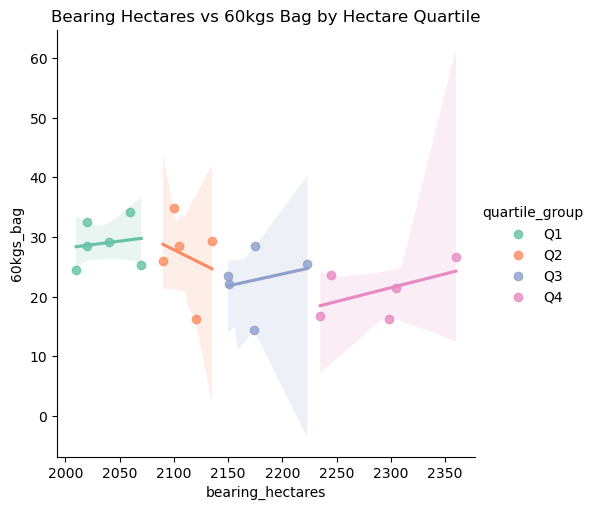

In [102]:
# Create based quartiles or production groupings
minas_coffee.loc[:,'quartile_group'] = pd.qcut(minas_coffee['bearing_hectares'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Scatter with hue
#plt.figure(figsize=(10, 6))
sns.lmplot(data=minas_coffee, x='bearing_hectares', y='60kgs_bag', hue='quartile_group', palette='Set2')
plt.title('Bearing Hectares vs 60kgs Bag by Hectare Quartile')
plt.show()


### Observations and Questions gained from Quartile Groups of Bearing Hectaresw Per 60kgs Bag:

**Observations**
- Per Simpson's Paradox: splitting the bearing_hectares variable into quartiles indentified distinct trends within each group that were not visible in the overall correlation.
- Q1--lowest hectares--showed a slightly positive correlation, suggesting higher yield per hectare or greater efficiency.
- Q2--lower-mid hectares--had a negative slope, possibly indicating inefficiencies per transitional period.
- Q3 and Q4--higher hectare grouping--began to tend to positive recovery trends, albeit with increased variability.
- The overall negative Pearson correlation may therefore oversimplify the complexity within or of grouped farm partitions/sizes.

**Questions**
- Are there operational, environmental, or geographic factors that explain the dip in efficiency for Q2?
- Should yield per hectare directly be investigated, across quartiles?
- Would nonlinear models be able to capture this pattern more clearly than Pearson correlation??

**Additional Notes:**
- The plot was enhanced using pd.qcut() for quartile grouping and sns.lmplot() for regression by hue.
- The use of confidence intervals around regression lines further illustrated variation within quartiles, with Q2 and Q3 showing wider uncertainty 'bands'.
**Resources:**

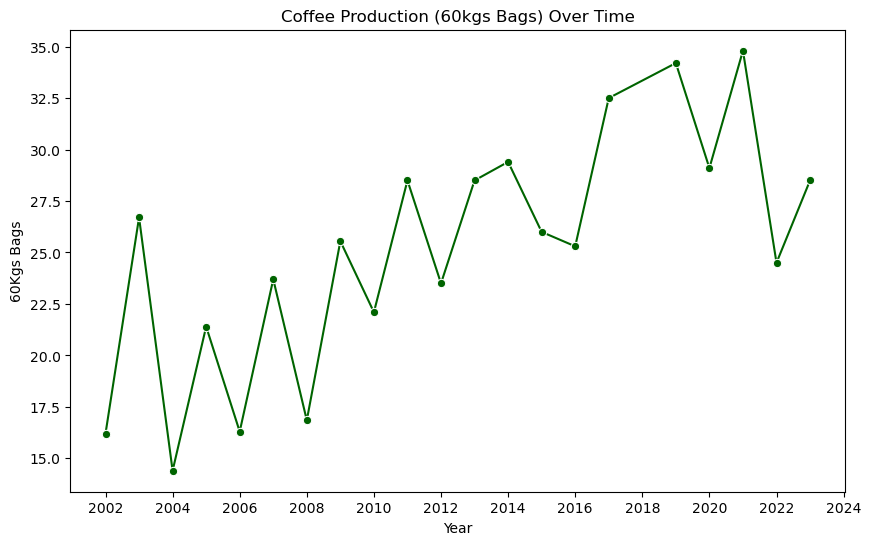

In [103]:
# TODO: BEGIN YOUR EDA!
plt.figure(figsize=(10, 6))
sns.lineplot(data=minas_coffee, x="year", y="60kgs_bag", marker="o", color="darkgreen")
plt.title("Coffee Production (60kgs Bags) Over Time")
plt.xlabel("Year")
plt.ylabel("60Kgs Bags")
plt.gca().xaxis.set_major_locator(ticks.MultipleLocator(2))

### Observations and Questions gained from Line Plot of 60kgs Bags Over Time:


**Observations**
- The line plot shows a general upward trend in coffee production from 2002 to 2023. there are year-to-year fluctuations, particularly in the earlier years and around 2021–2022, the overall trend indicates a progressive increase in output.
- Notably, post-2010, production stabilizes at a higher range, frequently exceeding 25 million 60kg bags, with peak production occurring around 2021. This suggests possible improvements in agronomic practices, enhanced bearing efficiency per hectare, or favorable climatic conditions during those years.
- The temporary drop in 2022 and partial recovery in 2023 may suggest external disruptions such as climatic anomalies, disease outbreaks, etc...

**Questions**
- What underlying factors contributed to the increase in production post-2010?
- Could the sharp decline in 2022 be correlated with a specific regional or global event--drought, economic disruption, pest outbreak?
- Is there a statistically significant difference in production trends before and after 2010, and how might this be explained through policy, investment, or technology changes?

Additional Notes: 
- Overlaying this trend with other agronomic indicators--bearing tree density, rainfall, or pest pressure--may provide more granular insight into yield dynamics.
- A rolling average or smoothed line might enhance the visibility of long-term trends while minimizing the impact of short-term volatility.

**Resources:**

In [104]:
# Check distribution of bearing trees
r, p = pearsonr(minas_coffee['year'], minas_coffee['60kgs_bag'])
print(f"Pearson's r: {r:.2f}, p-value: {p:.3e}")

# Check for normality using Shapiro-Wilk test
stat, p_value = shapiro(minas_coffee['60kgs_bag'])
print(f"Shapiro-Wilk Test: p-value = {p_value:.3f}")
if p_value < 0.05:
    print("Data is not normally distributed (reject H0)")
else:
    print("Data appears normally distributed (fail to reject H0)")


Pearson's r: 0.72, p-value: 2.172e-04
Shapiro-Wilk Test: p-value = 0.436
Data appears normally distributed (fail to reject H0)


### Observations and Questions gained from Pearson Correlation Coefficient between year and 60kgs Bags:


**Observations**
- According to the Pearson Correlation Coefficient (r = 0.72, p-value = 2.172e-04), there is a strong positive linear relationship between year and coffee production (measured in 60kg bags), which is statistically significant (p < 0.05). Suggesting that coffee production has generally increased over time.
- The Shapiro-Wilk test result (p = 0.436) indicates that the distribution of the production data does not significantly deviate from normality.
- This increasing trend could reflect improvements in agronomic practices, investment in farming, expansion of productive tree-age-groups, or better climate adaptation strategies over the years.

**Questions**
- What specific interventions or developments contributed to the increase in coffee production over time?
- Are there particular years associated with sudden increases or dips in production?
- External market forces or export demand have influenced the sustained rise in production?

Additional Notes: 
- While correlation is strong, causation should be further explored through multivariate analysis--regression including climate, fertilizer, pest management, or tree age as variables??
- Follow-up visualizations--year-over-year rolling averages--may help reveal cyclical patterns.

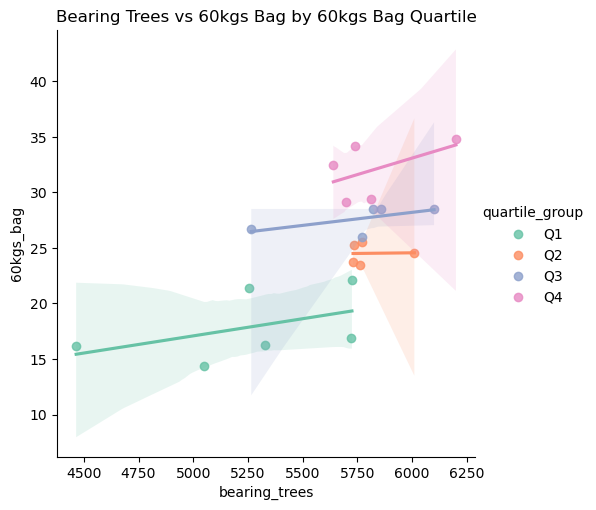

In [107]:
# Create based quartiles or production groupings
minas_coffee.loc[:,'quartile_group'] = pd.qcut(minas_coffee['60kgs_bag'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Scatter with hue
#plt.figure(figsize=(10, 6))
sns.lmplot(data=minas_coffee, x='bearing_trees', y='60kgs_bag', hue='quartile_group', palette='Set2')
plt.title('Bearing Trees vs 60kgs Bag by 60kgs Bag Quartile')
plt.show()


### Observations and Questions gained from Bearing Trees and 60kgs Bag Quartiles:

**Observations**
- Per Simpson's Paradox: According to The quartile-based scatterplot shows distinct trends in coffee production (60kg bags) relative to the number of bearing trees.
- In Q1 (lowest production quartile), even with varying tree counts, production remains relatively low and flat.
- As we move toward Q4 (highest production quartile), the relationship becomes more linear and positively sloped, indicating that in higher production groups, increases in tree count are more directly associated with increased yield.
- Quartile Q2 shows a flat slope, hinting at efficiency issues or external limitations, where increasing tree count does not improve yield significantly.
- Quartiles Q3 and Q4 exhibit stronger linear relationships, suggesting greater productivity or efficiency of land/tree management at these levels.

**Questions**
- Are there diminishing returns to adding more bearing trees beyond a certain point, especially in Q2?
- How do regional factors (soil, elevation, precipitation) influence these quartile trends?

**Additional Notes:**
- This quartile-based EDA deepens understanding beyond a single Pearson correlation, revealing nuanced subgroup behaviors.
- Further investigation into per-tree yield or land use efficiency across quartiles could refine agronomic insights.
- Maybe I can use boxplots by quartile group to explore variability in yield distributions.

**Resources:**

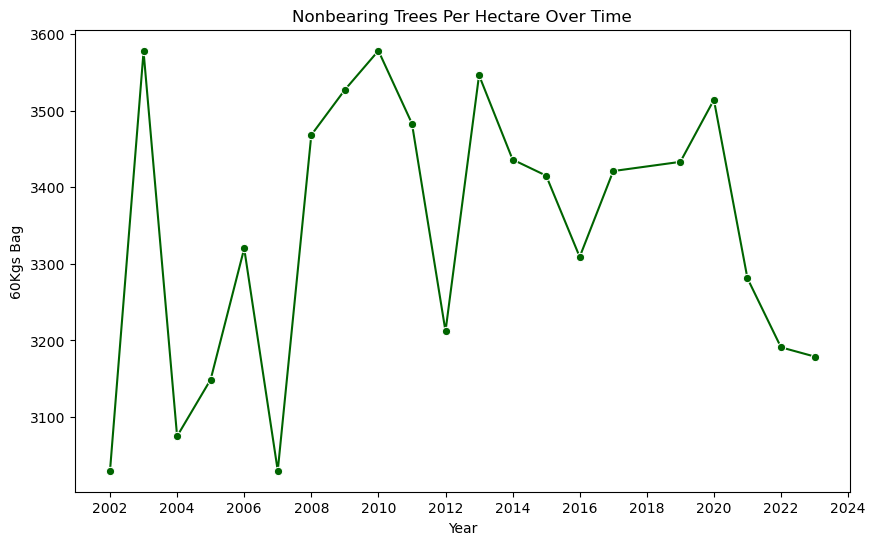

In [59]:
# 60Kgs Bag  Wind Speed and Average Wind Speed over time.
plt.figure(figsize=(10, 6))
sns.lineplot(data=minas_coffee, x="year", y="nonbearing_trees_per_hectare", marker="o", color="darkgreen")
plt.title("Nonbearing Trees Per Hectare Over Time")
plt.xlabel("Year")
plt.ylabel("60Kgs Bag")
plt.gca().xaxis.set_major_locator(ticks.MultipleLocator(2))

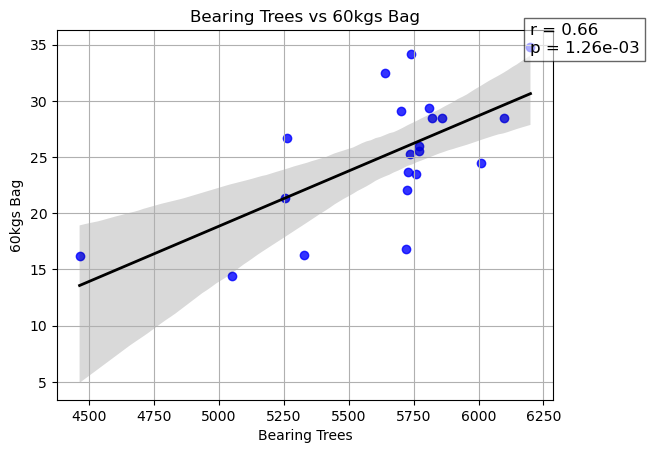

In [61]:
# Calculate correlation coefficient between bearing_trees and 60kgs_bag
# If p_value < r_value then we reject the null hypothesis, meaning tha there is a statistically significant difference between the two variables.
# If p_value > r_value then we reject the null hypothesis, meaning that there is no statistcially signifacant difference between the two variables.
r_value, p_value = pearsonr(x=minas_coffee['bearing_trees'], y=minas_coffee['60kgs_bag'])

# Create scatterplot
sns.regplot(data=minas_coffee, x='bearing_trees', y='60kgs_bag', scatter_kws={'color': 'blue'}, line_kws={'color': 'black', 'linewidth': 2})

# Add correlation coefficient to plot
plt.text(
    x=minas_coffee['bearing_trees'].max() - 2,
    y=minas_coffee['60kgs_bag'].max() - 0.5,
    fontsize=12,
    s=f"r = {r_value:.2f}\np = {p_value:.2e}",
    bbox=dict(facecolor='white', alpha=0.6)
)
plt.title("Bearing Trees vs 60kgs Bag")
plt.xlabel("Bearing Trees") 
plt.ylabel("60kgs Bag")
plt.grid(True) 

### Observations and Questions gained from Pearson Correlation Coefficient between Bearing Trees vs 60kgs Bag:

**Observations**
- The Pearson correlation coefficient (r = 0.66) indicates a moderately strong positive linear relationship between the number of bearing trees and coffee production (measured in 60kg bags).
- The p-value (p = 0.00126) is well below the 0.05 threshold, suggesting that this relationship is statistically significant and unlikely due to random chance.
- The scatter plot and regression line suggest that increases in bearing tree count are associated with increases in coffee yield, though variability exists—some points deviate from the line.
- The confidence interval (shaded area) is narrower in the middle, showing more consistent data behavior where most of the data is concentrated. 

**Questions**
- What explains the variability in yield among similar bearing tree counts? Are other factors like rainfall, soil, or pest management at play?
- Does this positive trend continue beyond the observed data range, or are there diminishing returns at extremely high tree counts?
- Could tree age or spacing influence the effectiveness of yield per tree?

Additional Notes: 
- This analysis supports the idea that bearing tree count is a strong driver of production, making it a key feature for predictive modeling.
- To deepen the insight, consider conducting a residual analysis or combining this with quartile-based subgrouping, as done previously, to isolate high-performing ranges.

**Resources:**

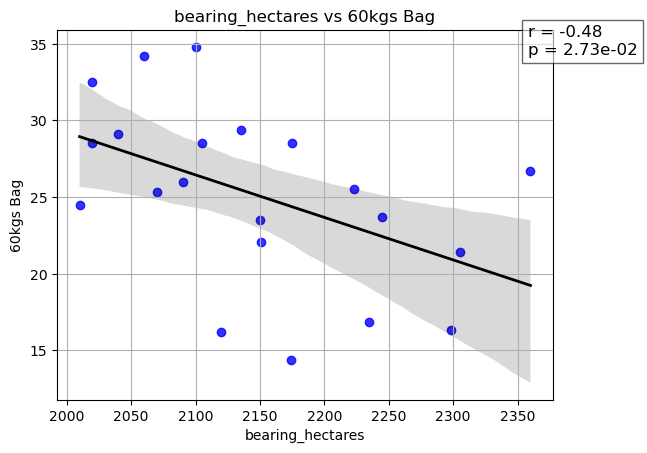

In [62]:
# Calculate correlation coefficient between bearing_trees and 60kgs_bag
# If p_value < r_value then we reject the null hypothesis, meaning tha there is a statistically significant difference between the two variables.
# If p_value > r_value then we reject the null hypothesis, meaning that there is no statistcially signifacant difference between the two variables.
r_value, p_value = pearsonr(x=minas_coffee['bearing_hectares'], y=minas_coffee['60kgs_bag'])

# Create scatterplot
sns.regplot(data=minas_coffee, x='bearing_hectares', y='60kgs_bag', scatter_kws={'color': 'blue'}, line_kws={'color': 'black', 'linewidth': 2})

# Add correlation coefficient to plot
plt.text(
    x=minas_coffee['bearing_hectares'].max() - 2,
    s=f"r = {r_value:.2f}\np = {p_value:.2e}",
    y=minas_coffee['60kgs_bag'].max() - 0.5,
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.6)
)
plt.title("bearing_hectares vs 60kgs Bag")
plt.xlabel("bearing_hectares") 
plt.ylabel("60kgs Bag")
plt.grid(True) 

### Observations and Questions gained from Pearson Correlation Coefficient between bearing_hectares vs 60kgs Bag:

**Observations**
- The Pearson correlation coefficient is -0.48, indicating a moderate negative correlation between bearing hectares and coffee production.
- The p-value of 0.0273 is below the 0.05 threshold, suggesting the negative relationship is statistically significant.
- This implies that as bearing hectares increase, the number of 60kg bags tends to decrease, which may seem counterintuitive.
- The regression line and scattered pattern show that larger hectares do not necessarily translate into higher yields, potentially hinting at lower productivity per hectare at larger scales.
- The wide confidence band suggests considerable variability across the data, especially in the mid--to higher hectare ranges.

- Splitting the bearing_hectares variable into quartiles revealed distinct trends within each group that were not visible in the overall correlation.
- Q1--lowest hectares--showed a slightly positive correlation, suggesting higher yield per hectare or greater efficiency.
- Q2--lower-mid hectares--had a negative slope, possibly indicating inefficiencies per transitional period.
- Q3 and Q4--higher hectare grouping--began to tend to positive recovery trends, albeit with increased variability.
- The overall negative Pearson correlation may therefore oversimplify the complexity within or of grouped farm partitions/sizes.

**Questions**
- Are there operational, environmental, or geographic factors that explain the dip in efficiency for Q2?
- Should yield per hectare directly be investigated, across quartiles?
- Would nonlinear models be able to capture this pattern more clearly than Pearson correlation??

- Why is production lower in larger hectare areas? Could this be due to less efficient land use, older trees, or lower planting density?
- Are there management, climate, or resource allocation differences across these hectare sizes?
- Would normalizing production as yield per hectare provide clearer insight?

**Additional Notes:**
- The plot was enhanced using pd.qcut() for quartile grouping and sns.lmplot() for regression by hue.
- The use of confidence intervals around regression lines further illustrated variation within quartiles, with Q2 and Q3 showing wider uncertainty 'bands'.

- This result is particularly relevant for efficiency assessments—larger farm size doesn't always equate to better output.
- Follow-up analysis should include yield per hectare.

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

How is bearing trees changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

- According to the Line Plot, there is a clear upward trend in the number of bearing coffee trees from 2002 to around 2013, indicating significant expansion in productive capacity. According to Pearson correlation coefficient (r = 0.78) indicates a strong positive linear relationship between Year and Bearing Trees — suggesting that the number of bearing trees in Minas Gerais has generally increased over time.

- Furthermore:
Per Simpson's Paradox: The scatter plot segmented by quartile groups shows distinct production patterns based on the number of bearing trees Quartile 1 (Q1) shows a strong positive correlation between the number of bearing trees and coffee output (60kgs_bag), but with higher variability. Quartile 2 (Q2) looks to be more volatile with a flatter or slightly negative slope, which indicates inconsistent yield in mid-range bearing tree counts. Quartile 3 (Q3) has the tightest clustering and minimal slope, indicating stable yields regardless of small changes in tree count. Quartile 4 (Q4) continures in a positive direction, showing that higher-end bearing tree counts coressponds to higher outputs, but with diminishing returns compared to Q1.

How is bearing hectares changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

- There is a clear long-term decline in the total number of bearing hectares from 2003 onward. After peaking around 2003 (≈2360 hectares), the area gradually shrinks to just above 2000 hectares by 2023, marking a noticeable reduction in land area dedicated to bearing coffee trees. The Pearson correlation coefficient is r = -0.82, indicating a strong negative linear relationship between year and bearing hectares. This suggests that as time progresses, the total area of land under bearing coffee cultivation in Minas Gerais has decreased significantly. The p-value 4.436e-06 < alpha, meaning this inverse trend is statistically significant--we can be confident this pattern isn't due to random variation. 
- The Shapiro-Wilk test returned a p-value of 0.003, which is below 0.05, leading us to reject the null hypothesis of normality. The data for bearing_hectares is therefore not normally distributed, and may have skewness influencing the distribution.
 
- Per Simpson's Paradox: splitting the bearing_hectares variable into quartiles indentified distinct trends within each group that were not visible in the overall correlation. Q1--lowest hectares--showed a slightly positive correlation, suggesting higher yield per hectare or greater efficiency. Q2--lower-mid hectares--had a negative slope, possibly indicating inefficiencies per transitional period. Q3 and Q4--higher hectare grouping--began to tend to positive recovery trends, albeit with increased variability. The overall negative Pearson correlation may therefore oversimplify the complexity within or of grouped farm partitions/sizes.



How is the count of million 60kgs bags of coffee changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

- The line plot shows a general upward trend in coffee production from 2002 to 2023.Notably, post-2010, production stabilizes at a higher range, frequently exceeding 25 million 60kg bags, with peak production occurring around 2021. According to the Pearson Correlation Coefficient--r = 0.72, p-value = 2.172e-04--there is a strong positive linear relationship between year and coffee production, which is statistically significant--p < 0.05. Indicating that coffee production has increased over time.

- Per Simpson's Paradox: According to The quartile-based scatterplot shows distinct trends in coffee production (60kg bags) relative to the number of bearing trees. In Q1 (lowest production quartile), production remains relatively low and flat. Toward Q4 (highest production quartile), the relationship becomes more linear and positively sloped, indicating that in higher production groups, increases in tree count are more directly associated with increased amounts/yields. Quartile Q2 shows a flat slope, hinting at efficiency issues or external limitations, where increasing tree count does not improve yield significantly. Quartiles Q3 and Q4 exhibit stronger linear relationships, suggesting greater productivity or efficiency of land/tree management at these levels.



What is the relationship between bearing_trees and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

 - The Pearson correlation coefficient (r = 0.66) indicates a moderately strong positive linear relationship between the number of bearing trees and coffee production (measured in 60kg bags). The p-value (p = 0.00126) is well below the 0.05 threshold, suggesting that this relationship is statistically significant and unlikely due to random chance. The scatter plot and regression line suggest that increases in bearing tree count are associated with increases in coffee yield, though variability exists—some points deviate from the line. The confidence interval (shaded area) is narrower in the middle, showing more consistent data behavior where most of the data is concentrated. 

 - As mentioned above, per Simpson's Paradox: According to The quartile-based scatterplot shows distinct trends in coffee production (60kg bags) relative to the number of bearing trees. In Q1 (lowest production quartile), even with varying tree counts, production remains relatively low and flat. As we move toward Q4 (highest production quartile), the relationship becomes more linear and positively sloped, indicating that in higher production groups, increases in tree count are more directly associated with increased yield. Quartile Q2 shows a flat slope, hinting at efficiency issues or external limitations, where increasing tree count does not improve yield significantly. Quartiles Q3 and Q4 exhibit stronger linear relationships, suggesting greater productivity or efficiency of land/tree management at these levels.


What is the relationship between bearing_hectares and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

- The Pearson correlation coefficient is -0.48, indicating a moderate negative correlation between bearing hectares and coffee production. The p-value of 0.0273 is below the 0.05 threshold, suggesting the negative relationship is statistically significant. This implies that as bearing hectares increase, the number of 60kg bags tends to decrease, which may seem a bit counterintuitive.

- Per Simpson's Paradox: splitting the bearing_hectares variable into quartiles revealed distinct trends within each group that were not visible in the overall correlation. Q1--lowest hectares--showed a slightly positive correlation, suggesting higher yield per hectare or greater efficiency. Q2--lower-mid hectares--had a negative slope, possibly indicating inefficiencies per transitional period. Q3 and Q4--higher hectare grouping--began to tend to positive recovery trends, albeit with increased variability. The overall negative Pearson correlation may therefore oversimplify the complexity within or of grouped farm partitions/sizes.
